In [2]:
from autoEncoderDense import AutoEncoderDense
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
# 1) Load the trained Encoder (with latent dimension d_opt)
load_dir = "C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/KFOLD_validation/encoders"
encoder_trained = AutoEncoderDense.load_encoder(load_dir, f"encoder_1_{12}")

type(encoder_trained)

tensorflow.python.keras.engine.functional.Functional

In [4]:
# 2) Preprocess and concatenate data --- ADD ALSO FILTERING STEP IN YOUR CASE
adhd= np.load('ucla_adhd_dbs80_filtered.npy')
bipolar= np.load('ucla_bipolar_dbs80_filtered.npy')
schizophrenia= np.load('ucla_schizophrenia_dbs80_filtered.npy')
controls= np.load('ucla_controls_dbs80_filtered.npy')

In [5]:
# Concatenate --- PORQUE YO TENGO DIFFERENTES BASES DE DATOS CREO QUE TU YA LO TIENES TODO EN UNA
all_data = np.concatenate((adhd, bipolar, schizophrenia, controls))
sz_set = all_data.shape
# Label all the patients: 1 = CNT, 2 = MCS, 3 = UWS --- ESO PARA CONSERVAR LA CLASSIFICACION ENTRE CONDICIONES
#all_data_labels = np.concatenate((all2_y, all2_4_y, allLiege_y))

In [6]:
# 3) Encode the concatenated data (dim d_opt) & obtain encoded time series for each patient
encoded_patients = np.empty([sz_set[0], 12, sz_set[2]])
for patient_idx in range(0, sz_set[0]):
    to_encode = all_data[patient_idx, :, :].transpose()
    to_encode = to_encode.reshape(to_encode.shape + (1,))
    encoded_patient = encoder_trained.predict(to_encode)
    encoded_patients[patient_idx, :, :] = encoded_patient.transpose()
save_dir = "C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/KFOLD_validation/results_d_opt_12"

In [7]:
# Save the results
sio.savemat(save_dir + f"/encoded_patients_1_{12}.mat",
            mdict={f'encoded_patients_1_{12}': encoded_patients})

In [8]:
encoded_patients[0,0].shape

(152,)

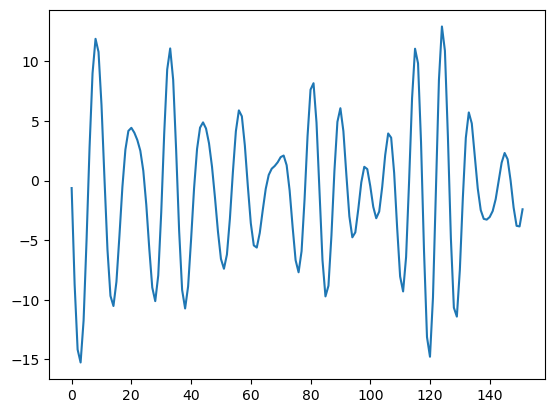

In [9]:
for i in range(1):
    plt.plot(encoded_patients[200,i, :])

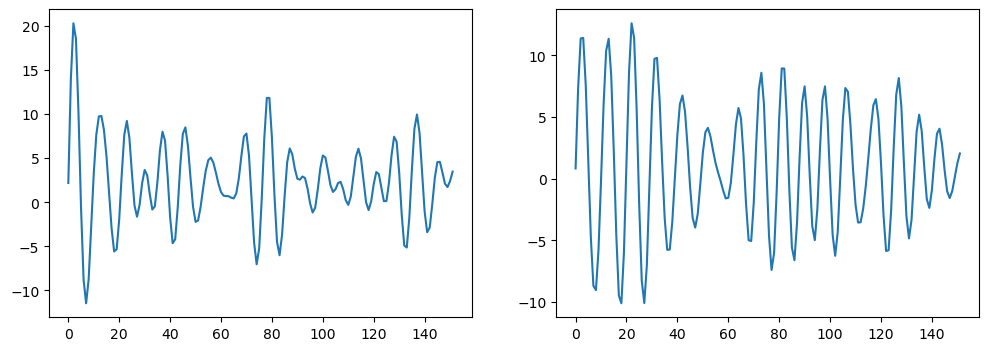

In [28]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(encoded_patients[3,7, :])
plt.subplot(1,2,2)
plt.plot(encoded_patients[3,8, :])
plt.savefig('data_encoded2', dpi = 1200)


In [11]:
import pandas as pd
df = pd.DataFrame()
for i in range(12):
    df[i+1] = encoded_patients[0, i]

In [12]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
1,-0.739571,-0.130816,-1.033337,-3.555472,-6.166549,-6.668134,-3.798379,1.640221,6.964839,9.090528,...,-7.529481,-8.430597,-6.464274,-2.614416,1.579284,4.704236,5.919231,5.055461,2.487251,-1.047103
2,-0.337743,4.628073,9.044448,11.780627,11.566671,7.690067,0.747363,-7.143087,-12.999002,-14.289842,...,12.548101,6.326457,-2.444232,-8.696170,-9.222006,-4.462195,2.018616,5.962259,5.164744,0.785522
3,-0.639364,-7.894939,-12.493003,-12.786669,-8.640523,-1.551606,5.818416,10.627483,11.023150,6.985155,...,-3.542124,-2.137191,-0.036053,1.463508,1.562684,0.421043,-1.027819,-1.751052,-1.314025,-0.138012
4,0.579125,4.525648,5.861463,3.670412,-0.754643,-4.681111,-5.587084,-2.703112,2.478292,7.033265,...,-5.357740,-11.936372,-13.170512,-8.624866,-0.175131,8.799253,14.703694,15.065468,9.502270,-0.014705
5,-1.147533,-5.685218,-8.230981,-7.878256,-5.234122,-1.912472,0.512549,1.399913,1.227787,1.012403,...,-0.679400,-6.893007,-10.179188,-8.950528,-4.066793,1.801304,5.710467,5.961408,2.804417,-1.914012
6,0.650129,-2.757630,-3.806724,-1.792454,2.037802,5.298681,6.000341,3.795233,0.140559,-2.693956,...,6.980867,4.410433,-0.371878,-4.264211,-4.845712,-1.922429,2.455314,5.459848,5.399018,2.767628
7,0.952169,8.625506,12.274440,10.166306,3.479185,-4.372881,-9.542967,-9.708786,-5.159968,1.513919,...,4.010772,4.548416,3.849353,2.398028,0.742974,-0.699941,-1.717676,-2.245930,-2.259817,-1.707775
8,1.698016,8.536896,10.306497,5.340949,-3.166856,-9.220616,-8.057611,0.503327,11.651878,18.458494,...,-0.742890,-4.021669,-4.649161,-2.465580,1.489725,5.534920,8.091341,8.278440,6.163333,2.648543
9,0.970200,2.911776,4.183090,4.413720,3.564549,1.932159,0.055690,-1.457624,-2.139270,-1.822005,...,-2.951658,-2.517521,-0.845980,1.191479,2.800341,3.596039,3.605827,3.043918,2.092630,0.860114
10,-0.919018,6.855023,11.577999,11.448839,6.758351,-0.355875,-6.964226,-10.647366,-10.416639,-6.886497,...,-5.601536,-3.993289,-1.240735,1.107170,2.077738,1.691401,0.705622,-0.052037,-0.271314,-0.282135


In [13]:
import dataframe_image as dfi
dfi.export(df.transpose(), 'df_styled.png', max_cols = 5, dpi = 800)

In [14]:
pip install dataframe_image